# Data visualisations

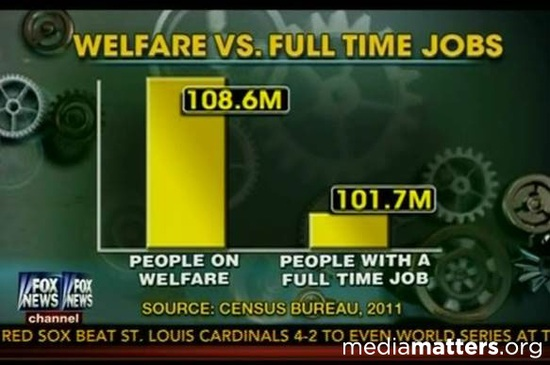

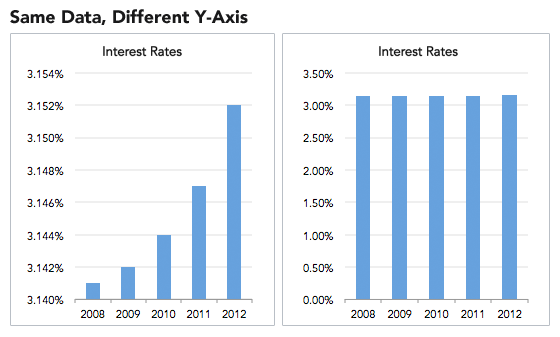

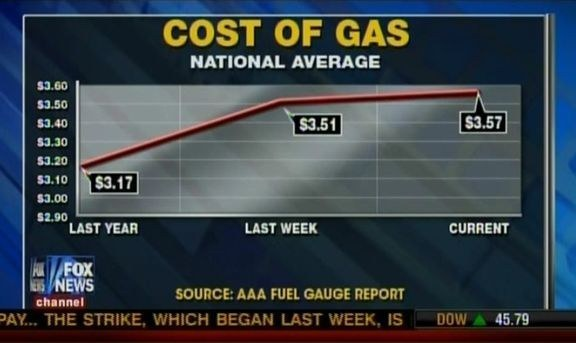

### The chart Tim Cook doesn’t want you to see
https://qz.com/122921/the-chart-tim-cook-doesnt-want-you-to-see/

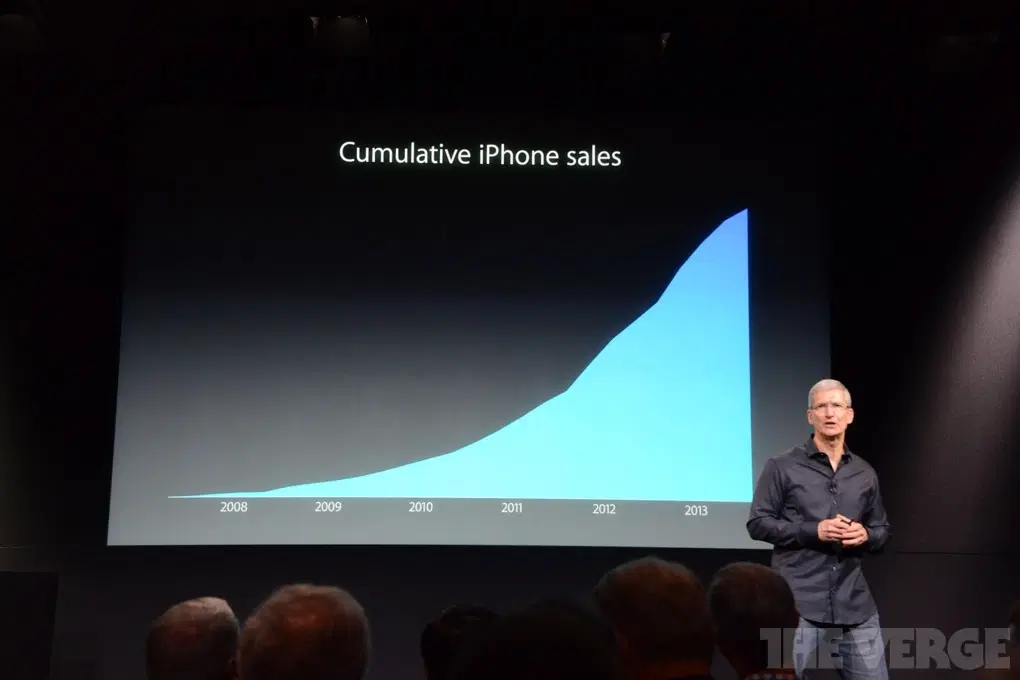

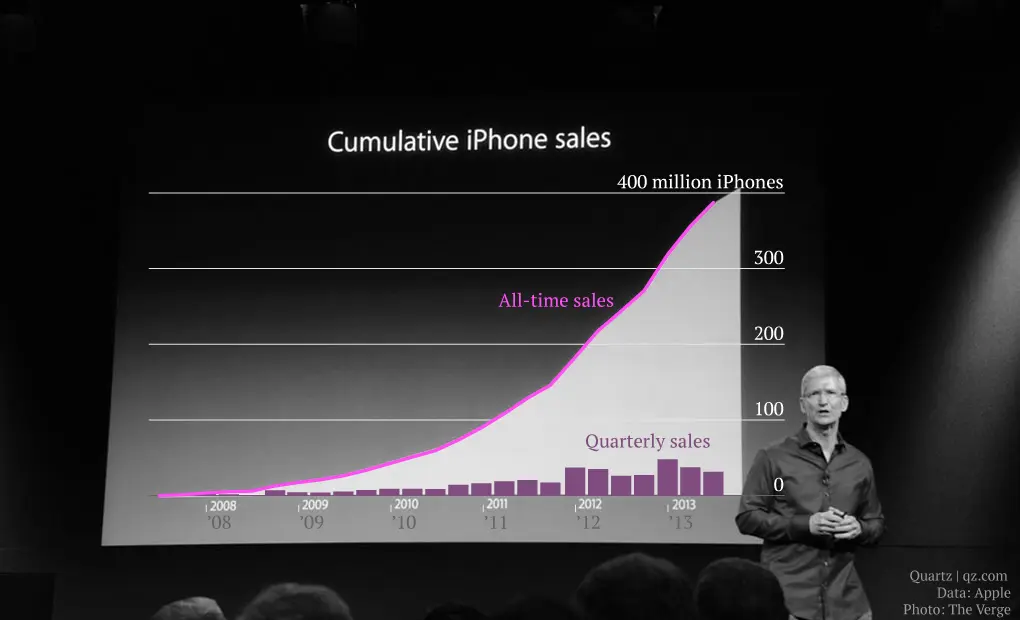

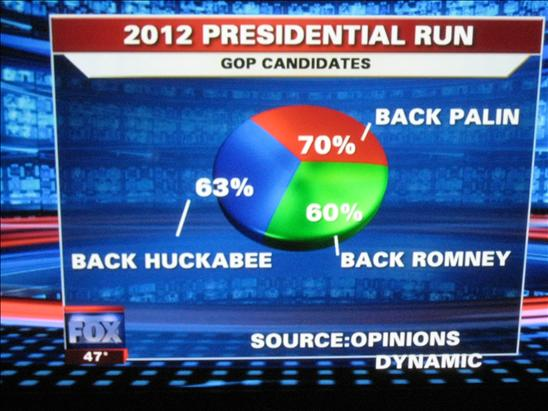

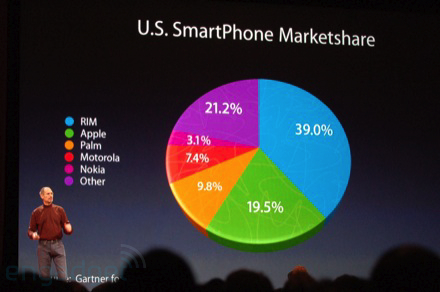

### 15 Misleading Data Visualization Examples
https://rigorousthemes.com/blog/misleading-data-visualization-examples/

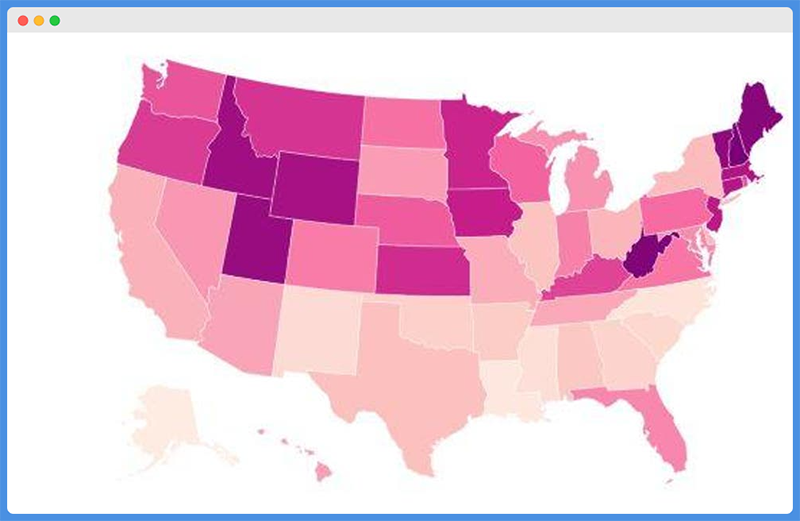

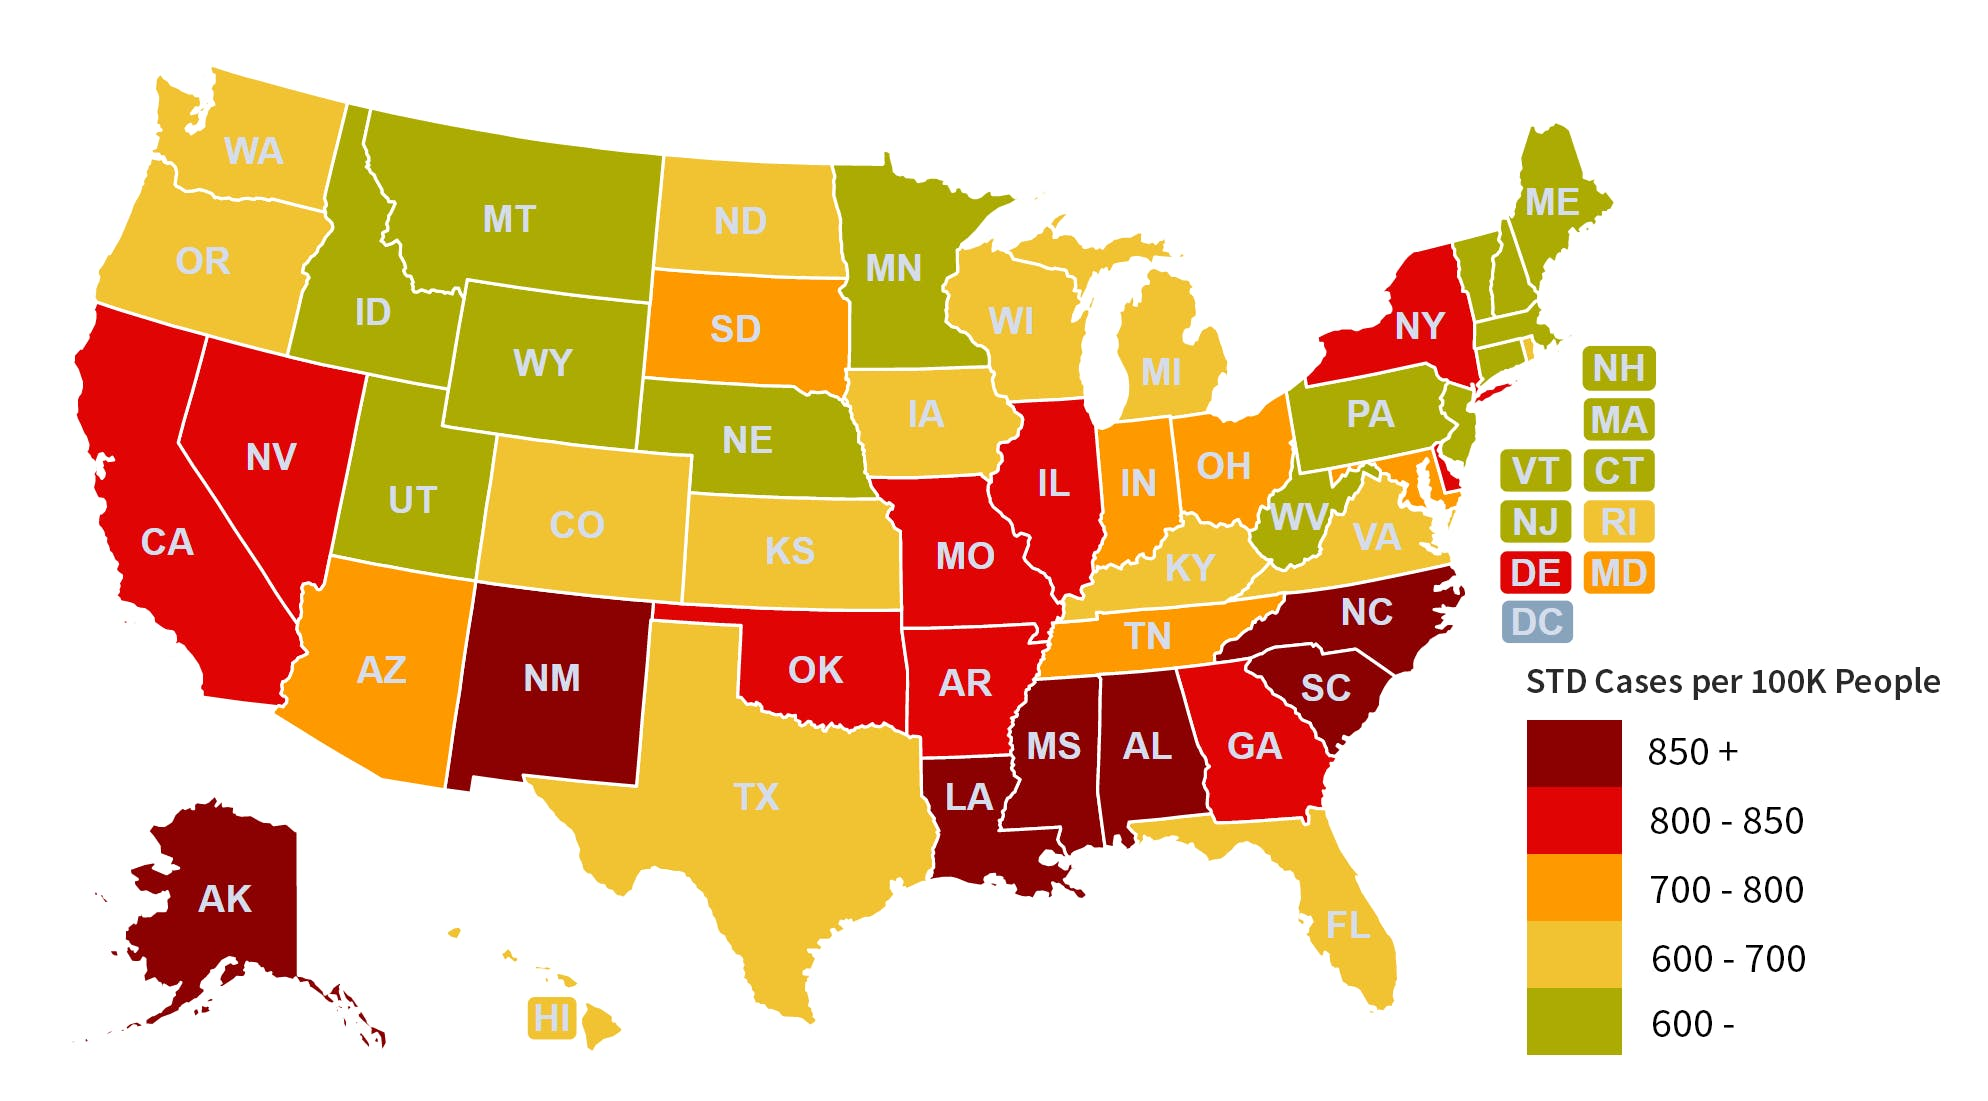

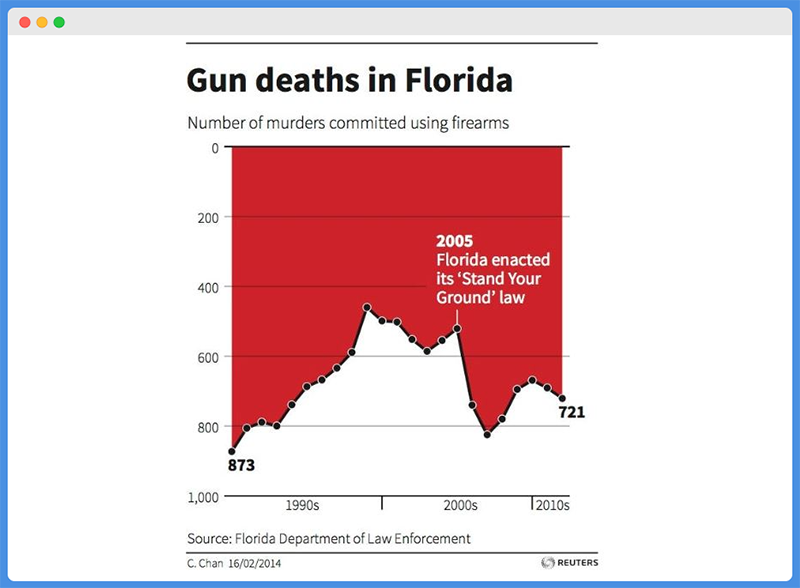

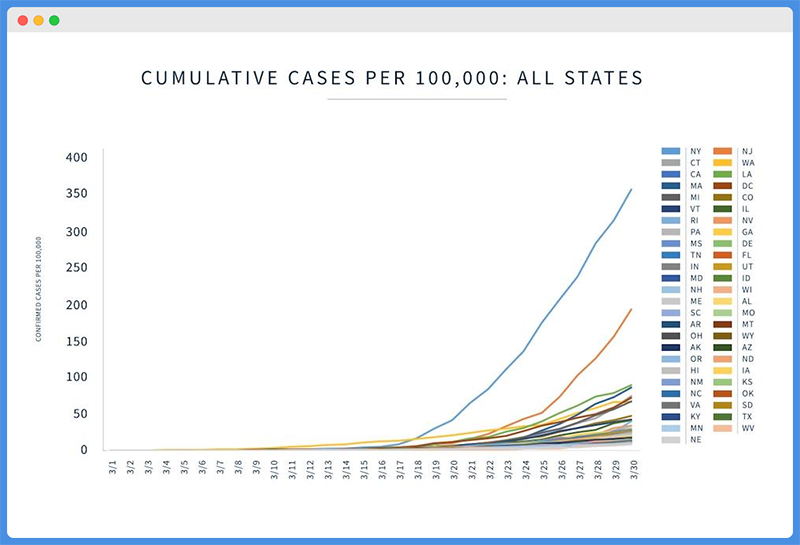

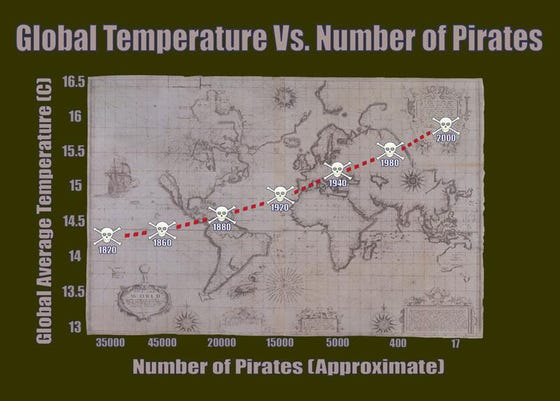

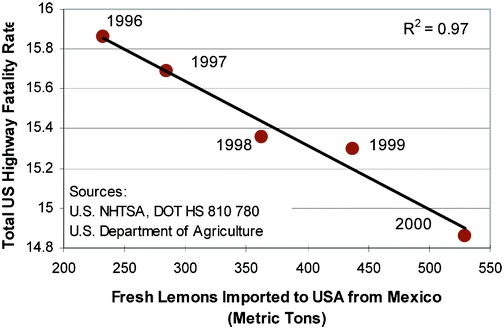

# Seaborn for Data visualisations

In [3]:
# we always need these two packages when we do any type of data analysis
import numpy as np
import pandas as pd

# import the seaborn module 
import seaborn as sns     

# import "old" visualisation package, it provides supporting functions
import matplotlib.pyplot as plt

# jupyter notebok magic to ensure that visualisation is correctly placed in notebook
%matplotlib inline

The main and "classical" package for data visualisation in Python is `matplotlib`. However, over time there were developed better packages with advanced functionality. So, we have `seaborn` - https://seaborn.pydata.org/index.html.

Package `seaborn` has a number of data sets embedded in the package and we can use them for presentation and testing.

In [4]:
# full list of packages embedded
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
# load a data set "Miles per gallon" - informations about cars and fuel consumption
# it is a larger version of the data set we used before
mpg = sns.load_dataset("mpg")
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

Before starting data analysis, we need to get a better understanding of the data.

In [6]:
mpg.shape

(398, 9)

In [7]:
mpg.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

### Distribution plot 
https://seaborn.pydata.org/generated/seaborn.displot.html

This is a "smart" function. It makes different charts depending on the data.

Try to re-call what are two types of data in statistical sense. Then re-call what are correct visualisations for each type of data.

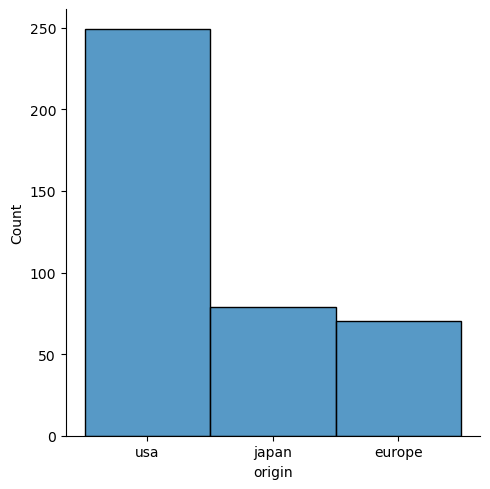

In [8]:
sns.displot(mpg, x = "origin")

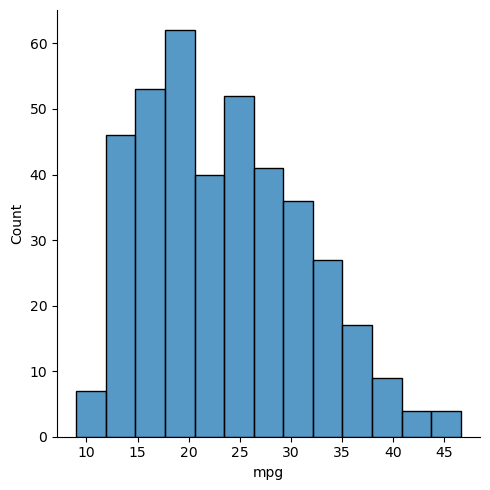

In [9]:
sns.displot(mpg, x = "mpg")

### Histogram 
https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot:xlabel='mpg', ylabel='Count'>

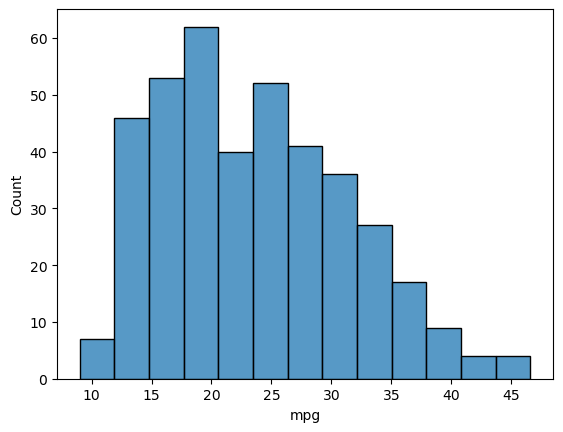

In [10]:
sns.histplot(mpg, x = "mpg")

It is important to select a "good" number for the number of bins in the histogram. Depending on that parameter, histogram might look quite different even for the same data.

<AxesSubplot:xlabel='mpg', ylabel='Count'>

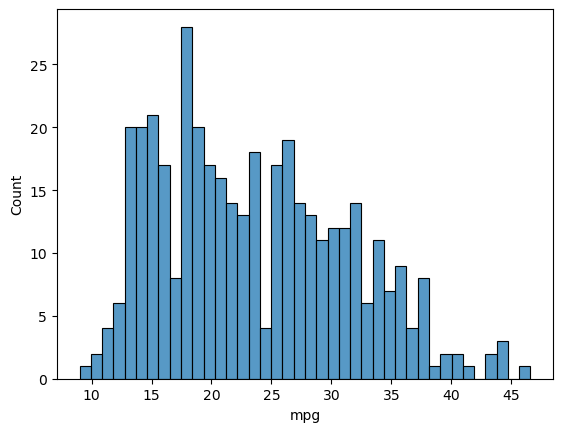

In [12]:
sns.histplot(mpg, x = "mpg", bins = 40)

### Box plot 
https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:ylabel='mpg'>

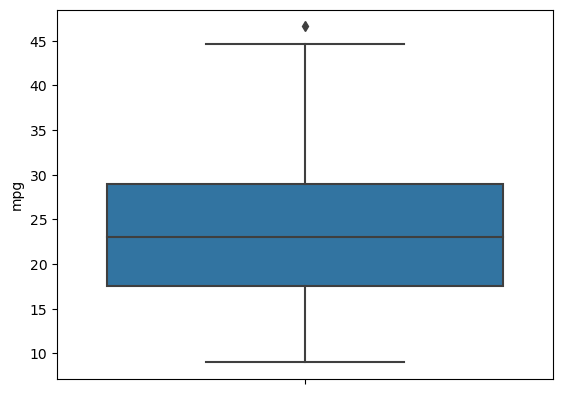

In [13]:
sns.boxplot(data = mpg, y = "mpg")

<AxesSubplot:xlabel='mpg'>

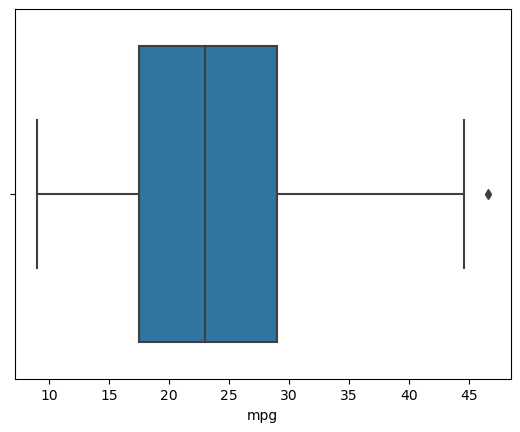

In [14]:
sns.boxplot(data = mpg, x = "mpg")

<AxesSubplot:xlabel='mpg'>

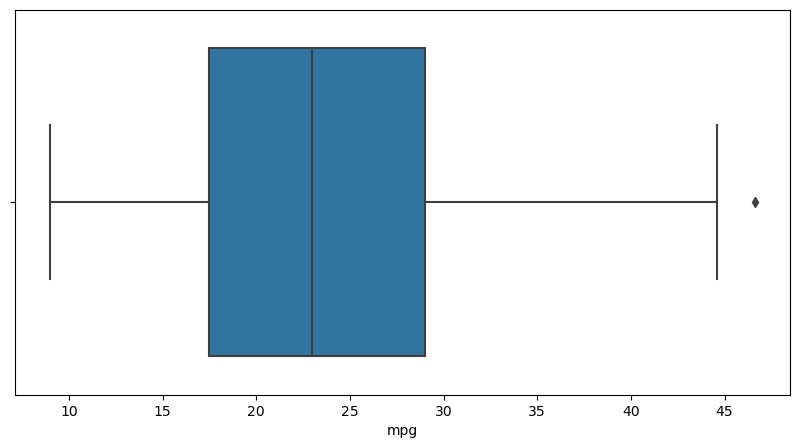

In [15]:
# adjust picture size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

sns.boxplot(data = mpg, x = "mpg")

### Combined plot of histogram and box plot
https://www.python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn

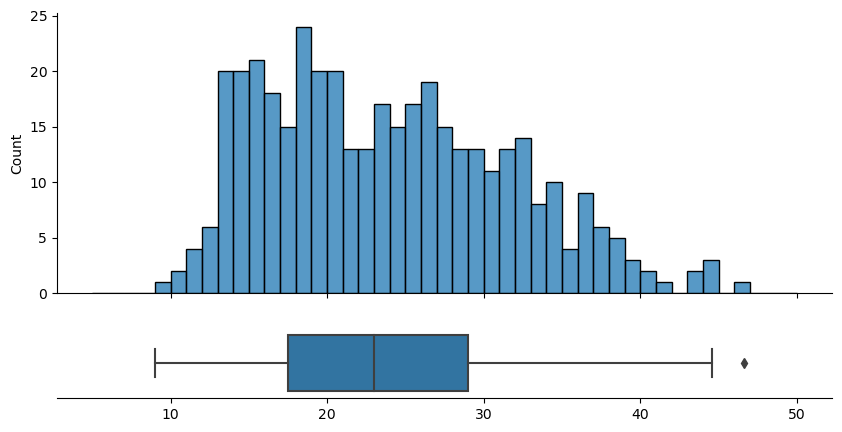

In [25]:
# sns.set(style="darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.8, .2)})
 
# assigning a graph to each ax
sns.boxplot(data = mpg, x = "mpg", ax = ax_box)
sns.histplot(data = mpg, x = "mpg", ax = ax_hist, binwidth = 1, binrange = [5,50])
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='', yticks=[])

sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.show()

### Relationship between 'mpg' and 'origin'

In [27]:
# remind ourselves the data structure
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [29]:
# get average fuel consumption per country of origin
mpg.groupby("origin").mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

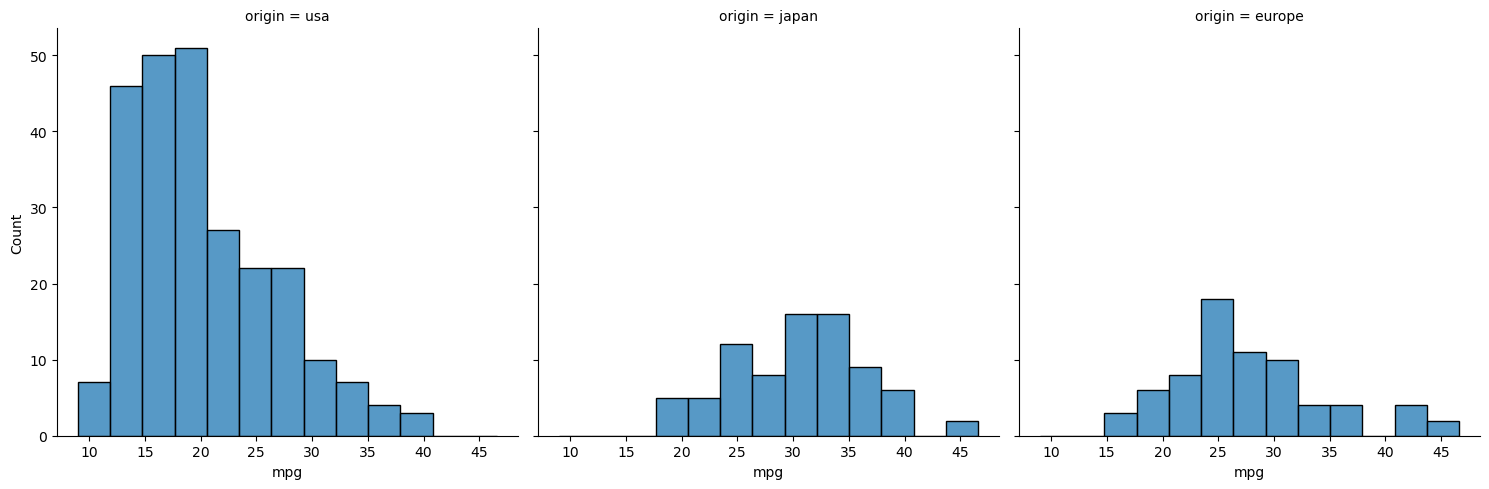

In [30]:
sns.displot(mpg, x = "mpg", col = "origin")

<AxesSubplot:xlabel='mpg', ylabel='Density'>

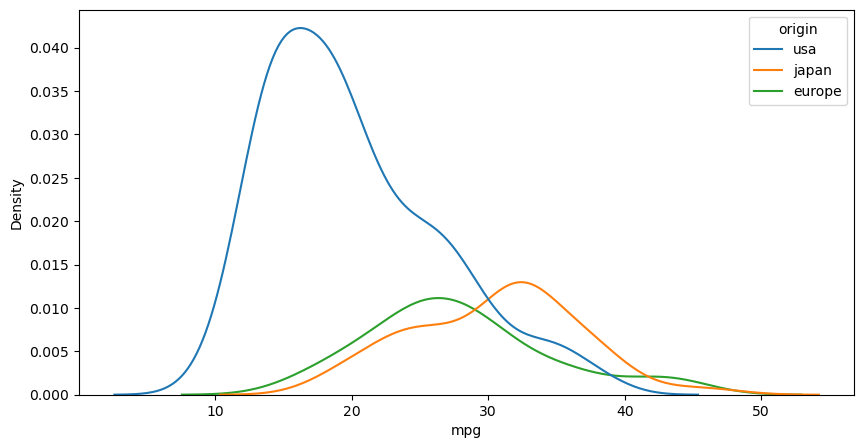

In [35]:
sns.kdeplot(data = mpg, x = "mpg", hue = "origin")

<AxesSubplot:xlabel='mpg', ylabel='Density'>

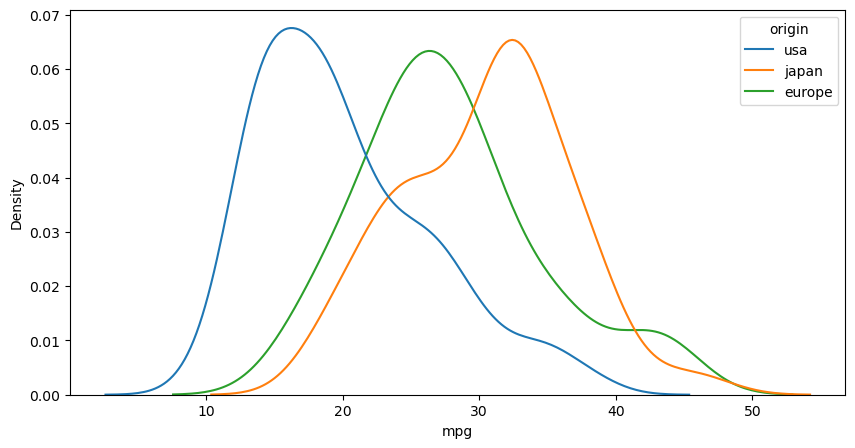

In [36]:
sns.kdeplot(data = mpg, x = "mpg", hue = "origin", common_norm = False)

<AxesSubplot:xlabel='mpg', ylabel='origin'>

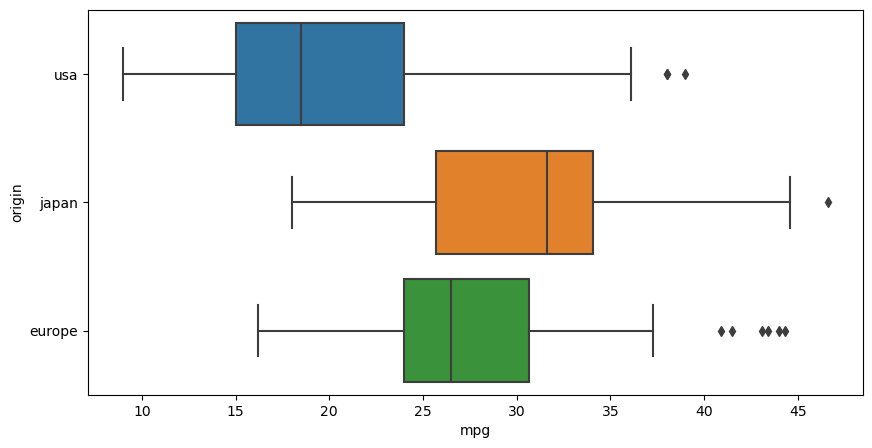

In [37]:
sns.boxplot(data = mpg, x = "mpg", y = "origin")

<AxesSubplot:xlabel='mpg', ylabel='origin'>

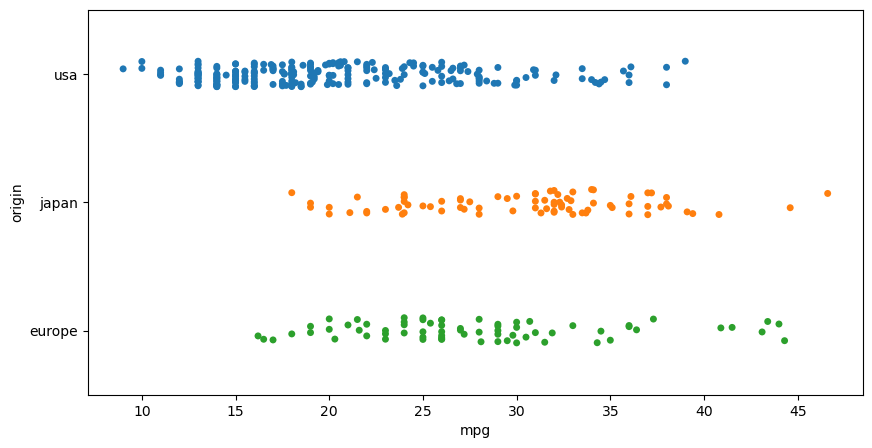

In [38]:
sns.stripplot(data = mpg, x = "mpg", y = "origin")

<AxesSubplot:xlabel='mpg', ylabel='origin'>

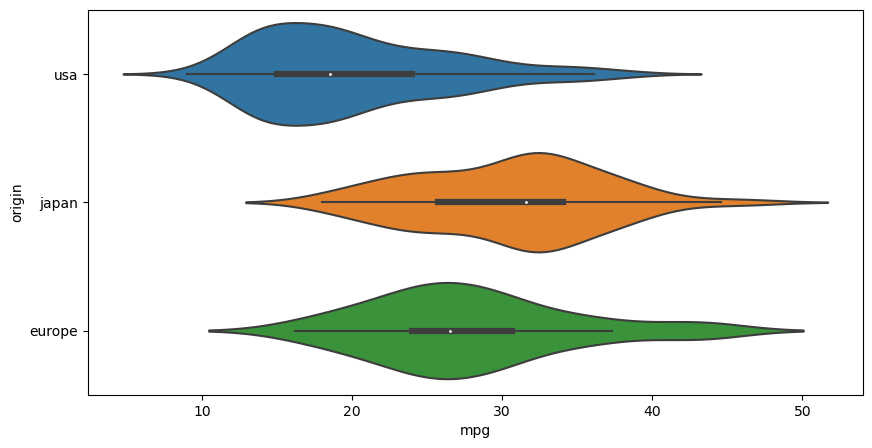

In [39]:
sns.violinplot(data = mpg, x = "mpg", y = "origin")

### Categorical data

In [40]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

<AxesSubplot:xlabel='origin', ylabel='count'>

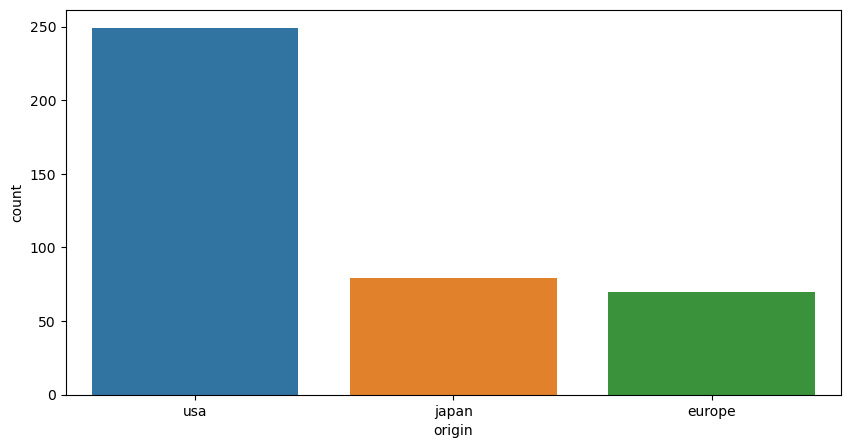

In [41]:
sns.countplot(data = mpg, x = "origin")

<AxesSubplot:xlabel='origin'>

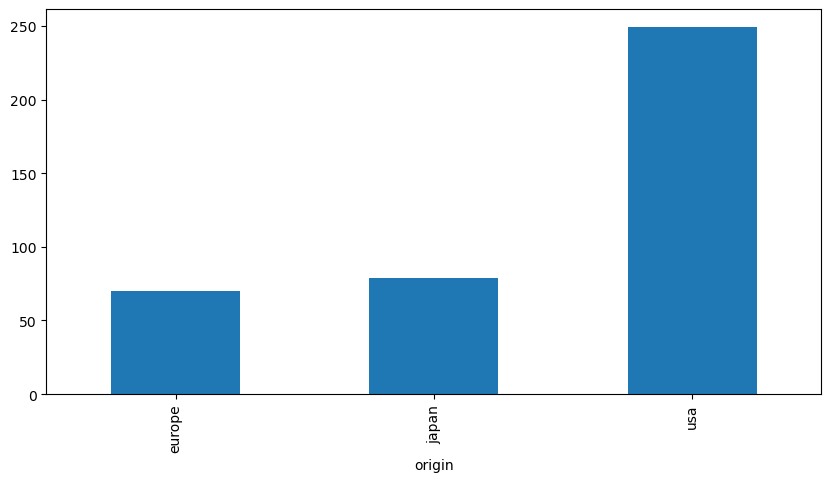

In [42]:
origin_counts = mpg.groupby("origin").origin.count()
origin_counts.plot(kind='bar')

In [43]:
origin_counts

origin
europe     70
japan      79
usa       249
Name: origin, dtype: int64

### Relationship between 'origin' and 'mpg'

<AxesSubplot:xlabel='origin', ylabel='mpg'>

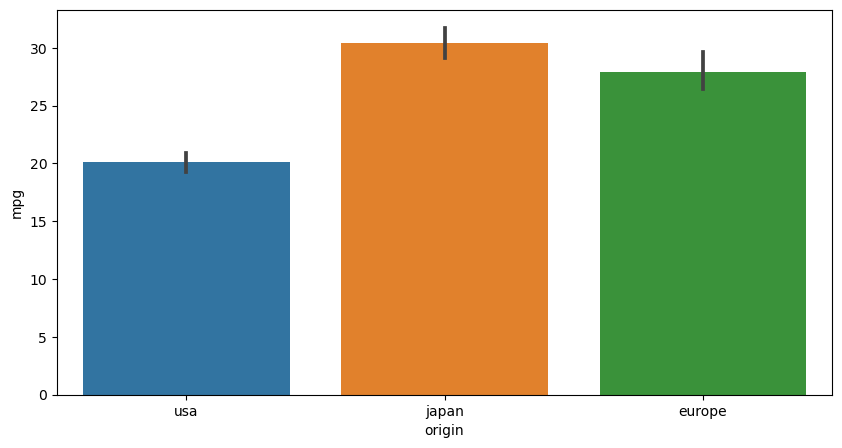

In [44]:
sns.barplot(x = "origin", y = "mpg", data = mpg)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

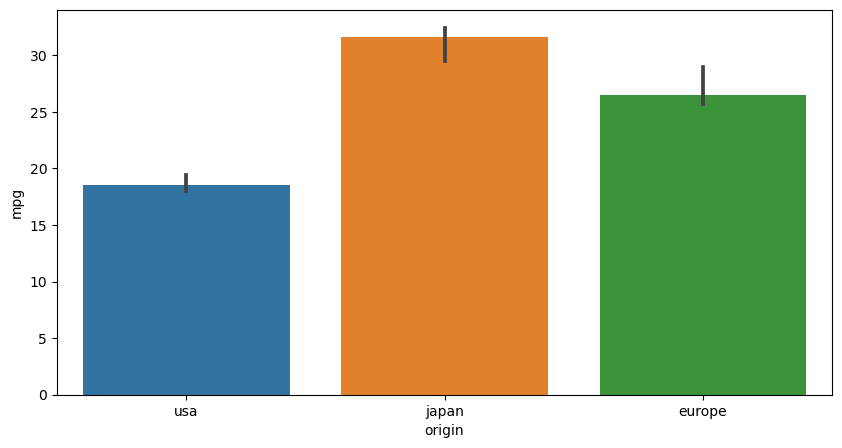

In [45]:
sns.barplot(x = "origin", y = "mpg", data = mpg, estimator = np.median)

### Relationship between numerical variables

In [46]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

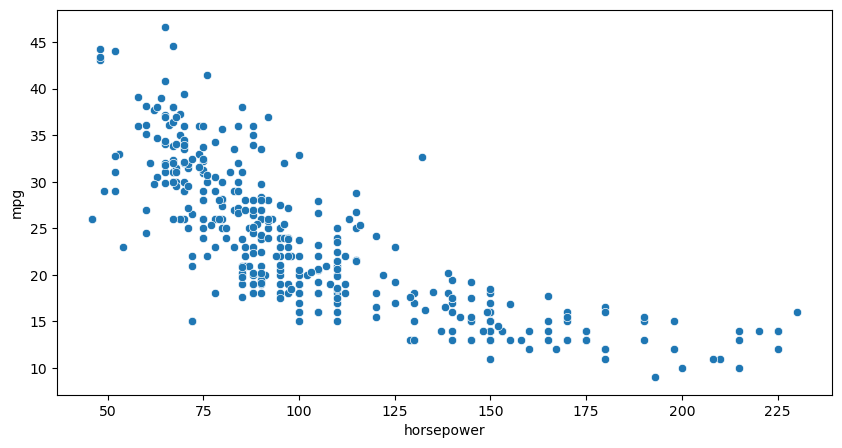

In [47]:
sns.scatterplot(data = mpg, x = "horsepower", y = "mpg")

[Text(0.5, 1.0, 'Horsepower VS mpg')]

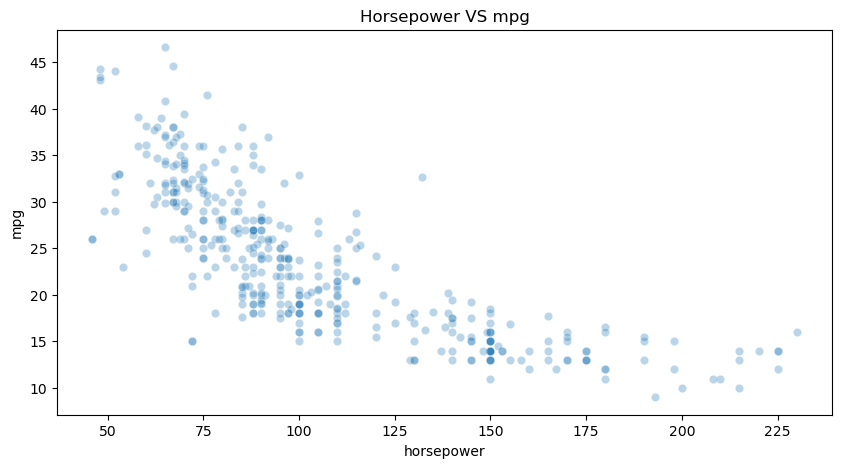

In [48]:
sns.scatterplot(data = mpg, x = "horsepower", y = "mpg", alpha = 0.3).set(title='Horsepower VS mpg')

[Text(0.5, 0, 'Power, hp'),
 Text(0, 0.5, 'Fuel consumption, mpg'),
 Text(0.5, 1.0, 'Horsepower VS mpg')]

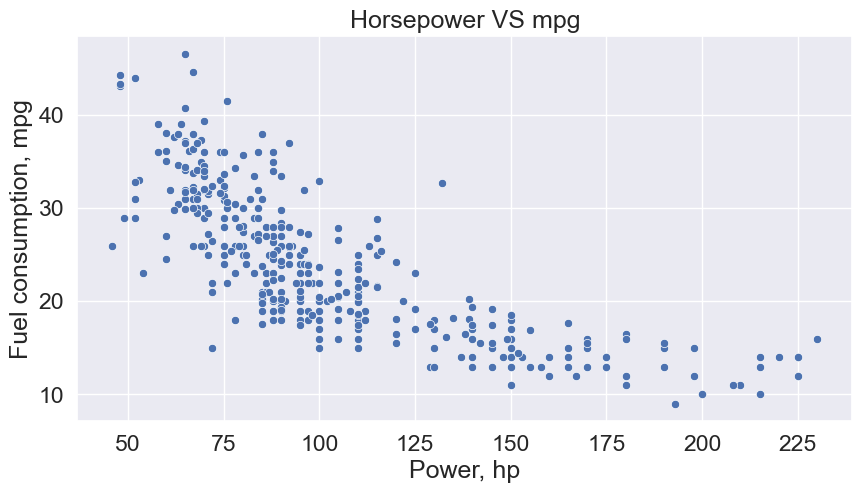

In [49]:
sns.set(font_scale=1.5)
my_graph = sns.scatterplot(data = mpg, x = "horsepower", y = "mpg")
my_graph.set(xlabel = "Power, hp", ylabel = "Fuel consumption, mpg", title = "Horsepower VS mpg")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

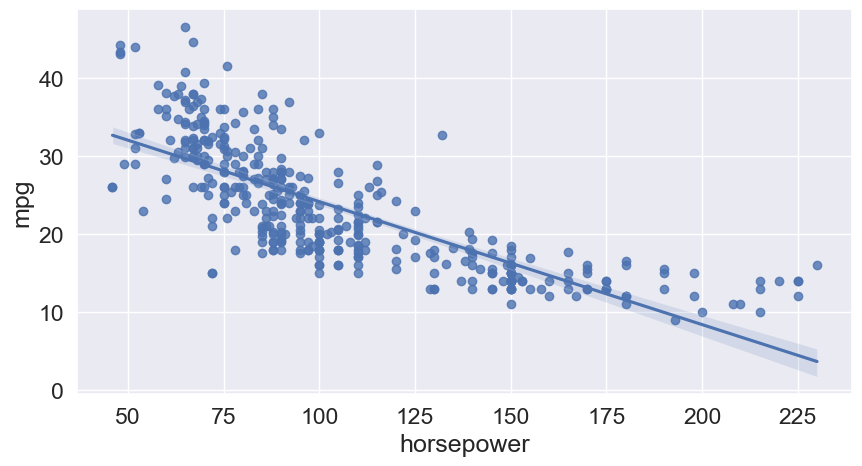

In [50]:
sns.regplot(data = mpg, x = "horsepower", y = "mpg")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

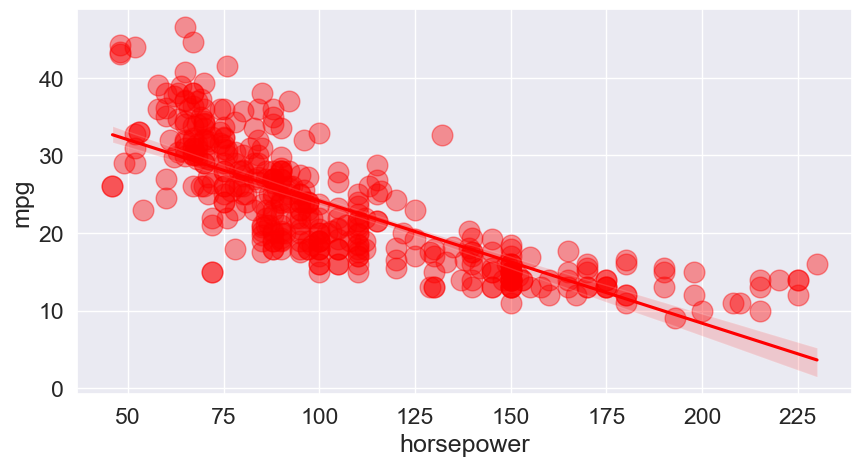

In [51]:
sns.regplot(data = mpg, x = "horsepower", y = "mpg", marker='o', color='red', scatter_kws={'s':222, 'alpha':0.4})

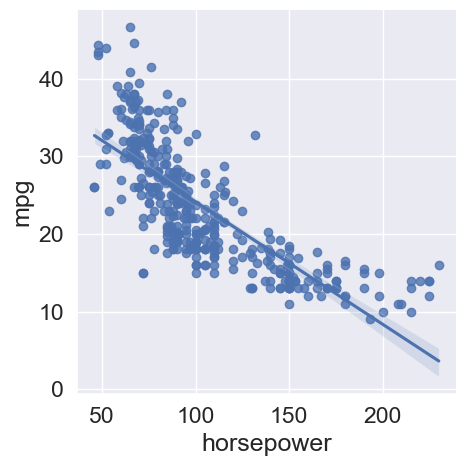

In [52]:
sns.lmplot(data = mpg, x = "horsepower", y = "mpg")

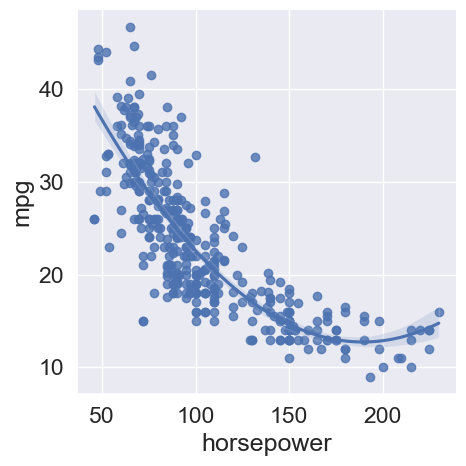

In [53]:
sns.lmplot(data = mpg, x = "horsepower", y = "mpg", order = 2)

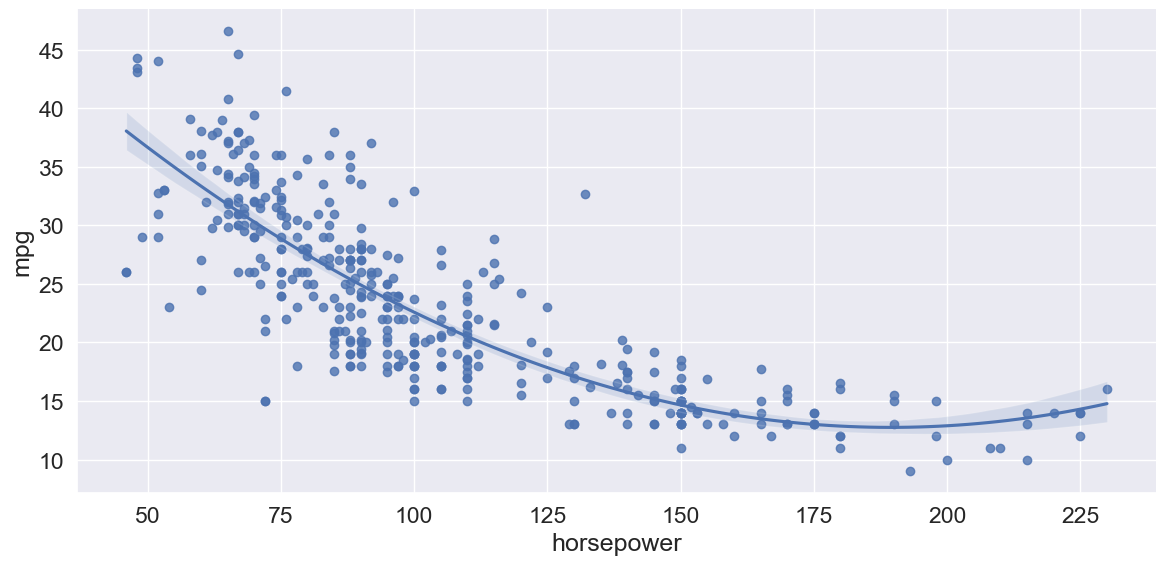

In [54]:
sns.lmplot(data = mpg, x = "horsepower", y = "mpg", order = 2, height=6, aspect=2)

### Multiple relationships

In [55]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

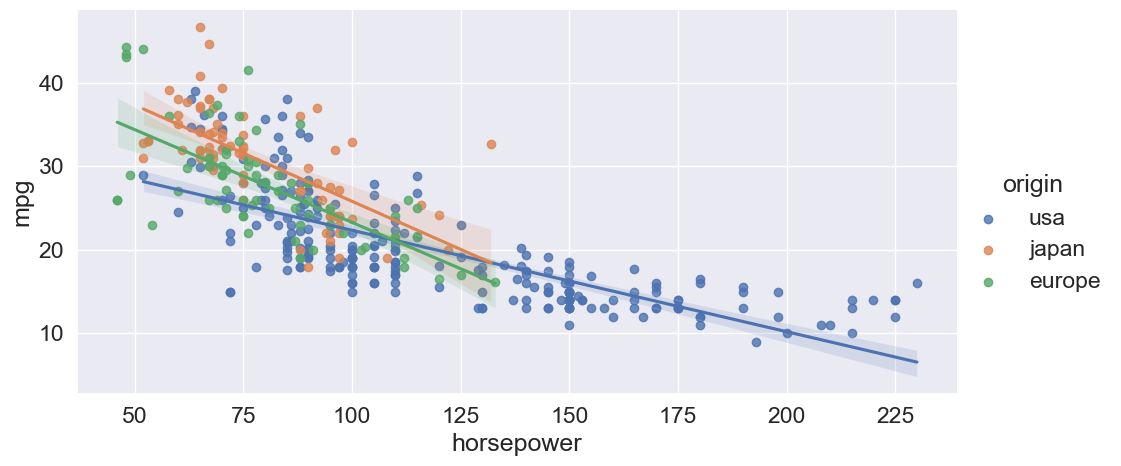

In [56]:
sns.lmplot(data = mpg, x = "horsepower", y = "mpg", hue = "origin", height=5, aspect=2)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

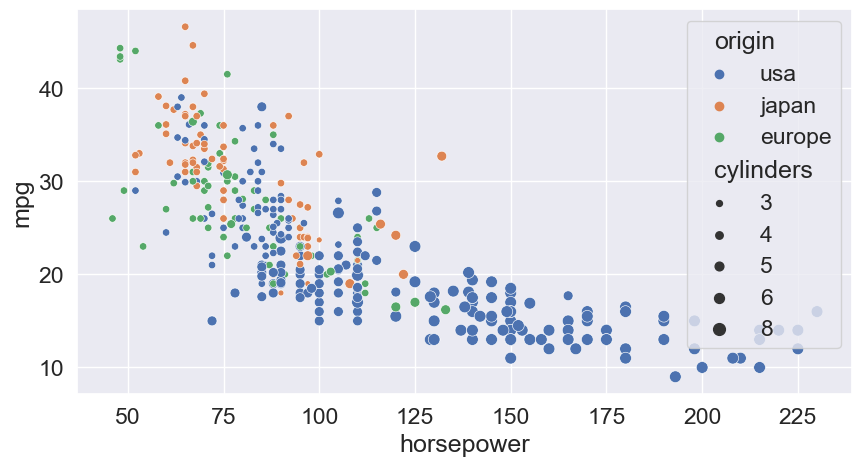

In [57]:
sns.scatterplot(data = mpg, x = "horsepower", y = "mpg", hue = "origin", size = "cylinders")

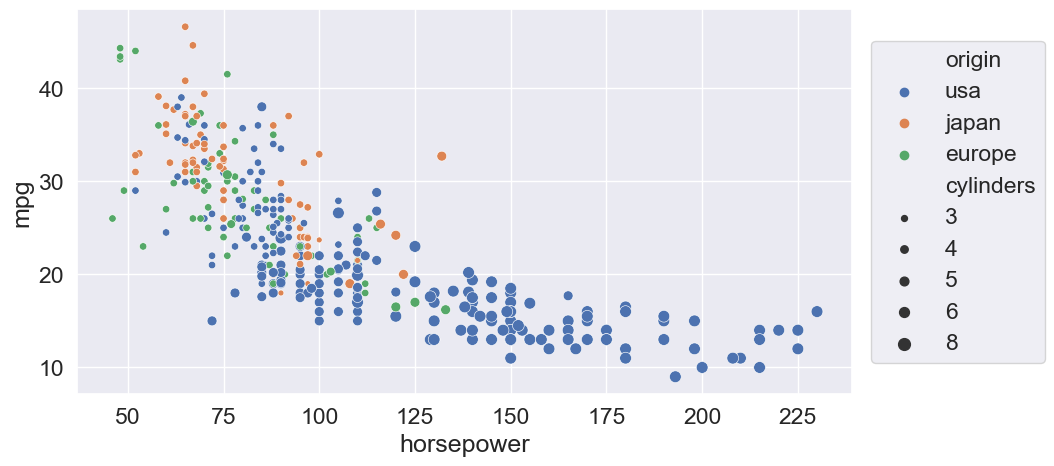

In [58]:
sns.scatterplot(data = mpg, x = "horsepower", y = "mpg", hue = "origin", size = "cylinders")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)

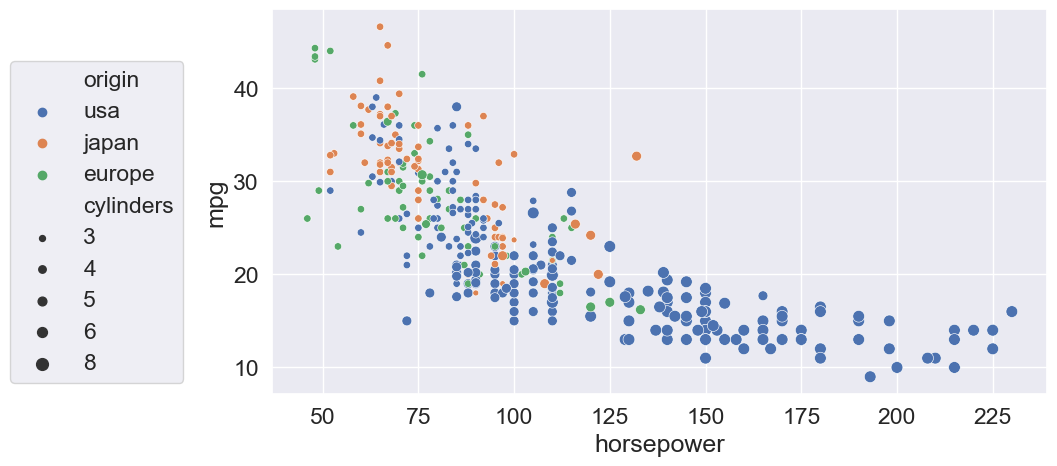

In [59]:
my_graph = sns.scatterplot(data = mpg, x = "horsepower", y = "mpg", hue = "origin", size = "cylinders")
my_graph.legend(loc='lower right', bbox_to_anchor=(-0.1, 0.0), ncol=1)